<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Trabajo 1: Imagenes médicas</font></b></h1>
        <h2><font color='0B5345'>Luisa Fernanda Enciso - Juan Diego Caguasango</font></h2>
    </div>
</div>

In [59]:
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_file
from pydicom import dcmread
import pandas as pd
from collections import defaultdict


<hr>
<h3><strong>1. Análisis de metadatos dicom y visualización</strong></h3>

**1.1.  Extraer y analizar los metadatos DICOM**


 Utilizar pydicom para extraer la metadata

In [60]:
# Ruta absoluta al archivo DICOM (puedes usar también rutas relativas si estás en el mismo directorio)
fpath = "Patient01/100/74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9.dcm"

ds = dcmread(fpath) # Lectura del archivo DICOM

ds # Imprimir el contenido completo del objeto DICOM (metadatos + cabecera + estructura)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.773
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9
(0008, 0020) Study Date                          DA: '20230821'
(0008, 0021) Series Date               


<h3><strong>Comfirmar Modalidad de imagen </strong></h3>

In [61]:
ds.Modality

'CT'

Se busca la metadata solicitada : 

• PatientName • Modality • SliceThickness • kVp • BodyPartExamined • Relative X-Ray Exposure • ExposureTime • Photometric Interpretation • Manufacturer • Scanner Model

In [62]:
# Extraer metadata
fields = {
    "PatientName": getattr(ds, "PatientName", "No disponible"),
    "Modality": getattr(ds, "Modality", "No disponible"),
    "SliceThickness": getattr(ds, "SliceThickness", "No disponible"),
    "KVP": getattr(ds, "KVP", "No disponible"),
    "BodyPartExamined": getattr(ds, "BodyPartExamined", "No disponible"),
    "RelativeXRayExposure": getattr(ds, "RelativeXRayExposure", "No disponible"),
    "ExposureTime": getattr(ds, "ExposureTime", "No disponible"),
    "PhotometricInterpretation": getattr(ds, "PhotometricInterpretation", "No disponible"),
    "Manufacturer": getattr(ds, "Manufacturer", "No disponible"),
    "ManufacturerModelName": getattr(ds, "ManufacturerModelName", "No disponible"),
}

# Mostrar resultados
for key, value in fields.items():
    print(f"{key}: {value}")

PatientName: anonymize
Modality: CT
SliceThickness: 0
KVP: 85
BodyPartExamined: 
RelativeXRayExposure: No disponible
ExposureTime: No disponible
PhotometricInterpretation: MONOCHROME2
Manufacturer: Sirona
ManufacturerModelName: 


 Organizar la metadata extraída en Name, Tag, Type y Value, explique a qué hace referencia 
cada uno de ellos, el grupo al que pertenece, su relevancia y los valores válidos para ese 
metadato.

In [63]:
print("Buscamos palabras relacionadas a lo especificado: ",ds.dir('Manufac') )# Comando para buscar la data necesaria
print("Encontramos el objeto: ",ds.data_element('Manufacturer'))
print("Solo miramos el tag: ",ds.data_element('Manufacturer').tag)
print("Ahora con el tag podemos extraer la info: ",ds.get((0x0010, 0x0010))) #extrare los datos con solo el tag

Buscamos palabras relacionadas a lo especificado:  ['Manufacturer', 'ManufacturerModelName']
Encontramos el objeto:  (0008, 0070) Manufacturer                        LO: 'Sirona'
Solo miramos el tag:  (0008, 0070)
Ahora con el tag podemos extraer la info:  (0010, 0010) Patient's Name                      PN: 'anonymize'


In [64]:
tags = [
    (0x0010, 0x0010),  # Patient's Name
    (0x0008, 0x0060),  # Modality
    (0x0018, 0x0050),  # Slice Thickness
    (0x0018, 0x0060),  # KVP
    (0x0018, 0x0015),  # Body Part Examined
    (0x0018, 0x1152),  # Exposure (a veces lo llaman Relative X-Ray Exposure)
    (0x0028, 0x0004),  # Photometric Interpretation
    (0x0008, 0x0070),  # Manufacturer
    (0x0008, 0x1090),  # Manufacturer Model Name
]
data_list = []

for group, element in tags:
    tag = (group, element)
    data_element = ds.get(tag)
    if data_element:
        data_list.append({
            "Name": data_element.name,
            "Tag": f"({group:04X},{element:04X})", # Formato hexadecimal
            "Type": data_element.VR,
            "Value": str(data_element.value),
            "Grupo": f"{group:04X}"
        })
    else:
        data_list.append({
            "Name": "Desconocido",
            "Tag": f"({group:04X},{element:04X})",
            "Type": "NA",
            "Value": "No disponible"
        })

df = pd.DataFrame(data_list)
df


,Name,Tag,Type,Value,Grupo
0,Patient's Name,"(0010,0010)",PN,anonymize,0010
1,Modality,"(0008,0060)",CS,CT,0008
2,Slice Thickness,"(0018,0050)",DS,0,0018
3,KVP,"(0018,0060)",DS,85,0018
4,Body Part Examined,"(0018,0015)",CS,,0018
5,Exposure,"(0018,1152)",IS,None,0018
6,Photometric Interpretation,"(0028,0004)",CS,MONOCHROME2,0028
7,Manufacturer,"(0008,0070)",LO,Sirona,0008
8,Manufacturer's Model Name,"(0008,1090)",LO,,0008


In [65]:
df['Relevancia y Referencia'] = [
    "Este campo es crucial para la identificación del paciente en el registro clínico. En investigaciones, se anonimiza para proteger la privacidad.",
    "Este valor indica el tipo de modalidad de imagen utilizada. Es fundamental para la interpretación de la imagen y su procesamiento automatizado.",
    "El grosor de cada corte de la imagen, expresado en milímetros. Un valor de 0 podría ser un marcador temporal o placeholder.",
    "El kilovoltaje pico utilizado durante la adquisición de la imagen. Este valor influye en la calidad de la imagen y la dosis de radiación aplicada.",
    "Identifica la parte del cuerpo que fue examinada en la imagen. Es importante para la organización y análisis de las imágenes.",
    "Hace referencia al nivel de exposición radiográfica, medido en mAs. Es un dato clave para evaluar la dosis de radiación recibida.",
    "Este valor define cómo deben interpretarse los píxeles en la imagen. En el caso de 'MONOCHROME2', los valores más bajos indican áreas oscuras en la imagen.",
    "Indica el fabricante del equipo de imagen utilizado. Esta información es útil para el soporte técnico, trazabilidad del equipo y análisis comparativo.",
    "Proporciona el modelo del equipo de imagen utilizado, lo que ayuda a estandarizar los estudios y facilitar la resolución de problemas específicos del dispositivo."
]

df

,Name,Tag,Type,Value,Grupo,Relevancia y Referencia
0,Patient's Name,"(0010,0010)",PN,anonymize,0010,Este campo es crucial para la identificación d...
1,Modality,"(0008,0060)",CS,CT,0008,Este valor indica el tipo de modalidad de imag...
2,Slice Thickness,"(0018,0050)",DS,0,0018,"El grosor de cada corte de la imagen, expresad..."
3,KVP,"(0018,0060)",DS,85,0018,El kilovoltaje pico utilizado durante la adqui...
4,Body Part Examined,"(0018,0015)",CS,,0018,Identifica la parte del cuerpo que fue examina...
5,Exposure,"(0018,1152)",IS,None,0018,Hace referencia al nivel de exposición radiogr...
6,Photometric Interpretation,"(0028,0004)",CS,MONOCHROME2,0028,Este valor define cómo deben interpretarse los...
7,Manufacturer,"(0008,0070)",LO,Sirona,0008,Indica el fabricante del equipo de imagen util...
8,Manufacturer's Model Name,"(0008,1090)",LO,,0008,Proporciona el modelo del equipo de imagen uti...


<h3>Referencias útiles de DICOM:</h3>
<ul>
  <li><a href="https://www.dicomlibrary.com/dicom/dicom-tags/" target="_blank">DicomLibrary - Lista de tags DICOM</a></li>
  <li><a href="https://dicom.innolitics.com/ciods/ct-image/patient/00100010" target="_blank">Innolitics - Tag específico Patient's Name (0010,0010)</a></li>
  <li><a href="https://dicom.nema.org/medical/dicom/current/output/chtml/part06/chapter_6.html" target="_blank">NEMA - Estándar oficial DICOM (Capítulo 6)</a></li>
</ul>

**1.2. Interpretación Técnica**


 Explicar cómo los parámetros técnicos se relacionan con el principio físico de la modalidad 
seleccionada. 

**1.3. Visualización**


 Cargar la imagen DICOM en Python y graficarla utilizando matplotlib. 

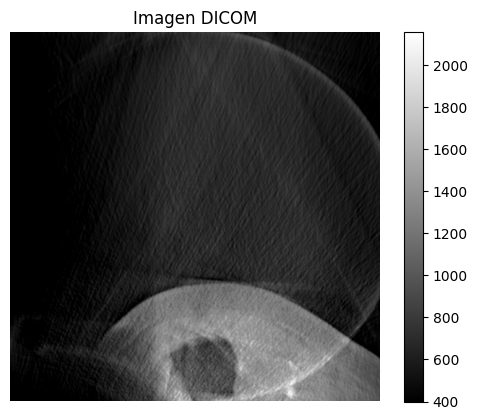

In [67]:
# Acceder a los datos de la imagen
image = ds.pixel_array

# Mostrar la imagen usando matplotlib
plt.imshow(image, cmap='gray')
#plt.imshow(image,cmap=plt.cm.bone)
plt.title("Imagen DICOM")
plt.axis("off")  
plt.colorbar()
plt.show()


<hr>
<h3><strong>2. Comparación multimodal de imágenes</strong></h3>

* Identificar la modalidad de cada imagen.

In [68]:
# Lista de rutas a las imágenes DICOM
rutas_dicom = [
    "Modalidad1/201/1.3.46.670589.11.45555.5.0.8860.2024062407351290058.dcm",
    "Modalidad2/ScalarVolume_13/IMG0001.dcm",
    "Modalidad3/ScalarVolume_27/IMG0036.dcm"
]

# Leer y mostrar la modalidad de cada imagen
for idx, ruta in enumerate(rutas_dicom, start=1):
    ds = pydicom.dcmread(ruta)
    modalidad = ds.get("Modality", "No disponible")
    print(f"Modalidad {idx}: {modalidad}")


Modalidad 1: MR
Modalidad 2: CR
Modalidad 3: CT


* Comparación 

    1. Calidad visual
    2. Resolucion numerica
    3. Diferencias de contraste percibidas

In [69]:
# Diccionario para guardar una sola entrada representativa por modalidad
metadata_imagenes = {
    'CR': {},
    'MR': {},
    'CT': {}
}

# Procesar archivos DICOM
for path in rutas_dicom:
    ds = pydicom.dcmread(path)
    mod = ds.get("Modality", "Otra")

    if mod not in metadata_imagenes:
        continue  

    if not metadata_imagenes[mod]: 
        metadata_imagenes[mod] = {
            "Shape": getattr(ds.pixel_array, "shape", "No disponible"),
            "PixelSpacing": ds.get("PixelSpacing", "No disponible"),
            "SliceThickness": ds.get("SliceThickness", "No disponible"),
            "ImageOrientationPatient": ds.get("ImageOrientationPatient", "No disponible"),
            "ImagePositionPatient": ds.get("ImagePositionPatient", "No disponible"),
            "KVP": ds.get("KVP", "No disponible"),
            "ExposureTime": ds.get("ExposureTime", "No disponible"),
            "EchoTime": ds.get("EchoTime", "No disponible"),
            "PhotometricInterpretation": ds.get("PhotometricInterpretation", "No disponible"),
            "WindowCenter": ds.get("WindowCenter", "No disponible"),
            "WindowWidth": ds.get("WindowWidth", "No disponible"),
            "PixelRepresentation": ds.get("PixelRepresentation", "No disponible"),
            "BitsStored": ds.get("BitsStored", "No disponible"),
            "BitsAllocated": ds.get("BitsAllocated", "No disponible"),
            "HighBit": ds.get("HighBit", "No disponible")
        }

# Lista completa de características a mostrar
caracteristicas = [
    "Shape", "PixelSpacing", "SliceThickness", "ImageOrientationPatient", "ImagePositionPatient",
    "KVP", "ExposureTime", "EchoTime", "PhotometricInterpretation", "WindowCenter",
    "WindowWidth", "PixelRepresentation", "BitsStored", "BitsAllocated", "HighBit"
]

# Construir tabla tipo DataFrame
tabla = {
    "Característica": caracteristicas,
    "CR": [metadata_imagenes['CR'].get(c, "No disponible") for c in caracteristicas],
    "MR": [metadata_imagenes['MR'].get(c, "No disponible") for c in caracteristicas],
    "CT": [metadata_imagenes['CT'].get(c, "No disponible") for c in caracteristicas],
}

tabla_comparacion = pd.DataFrame(tabla)
tabla_comparacion

,Característica,CR,MR,CT
0,Shape,"(2828, 2320)","(640, 640)","(512, 512)"
1,PixelSpacing,No disponible,"[0.4716981, 0.4716981]","[.399608615, .399608615]"
2,SliceThickness,1.0,4.0,1.0
3,ImageOrientationPatient,"[1, 0, 0, 0, 1, 0]","[0.9998723, -1.59611e-002, 7.28958e-004, 0, -4...","[.994881, -.101038, -.00190704, -.0015692, .00..."
4,ImagePositionPatient,"[0, 0, 0]","[-141.8852, 72.608, 145.6311]","[-90.4009, 168.451, 12.273]"
5,KVP,No disponible,No disponible,No disponible
6,ExposureTime,No disponible,No disponible,No disponible
7,EchoTime,No disponible,-1.0,No disponible
8,PhotometricInterpretation,MONOCHROME2,MONOCHROME2,MONOCHROME2
9,WindowCenter,62123.0,393.399994,-10.0


* Graficar las tres imagenes en un subplot 1x3 con matplotlib

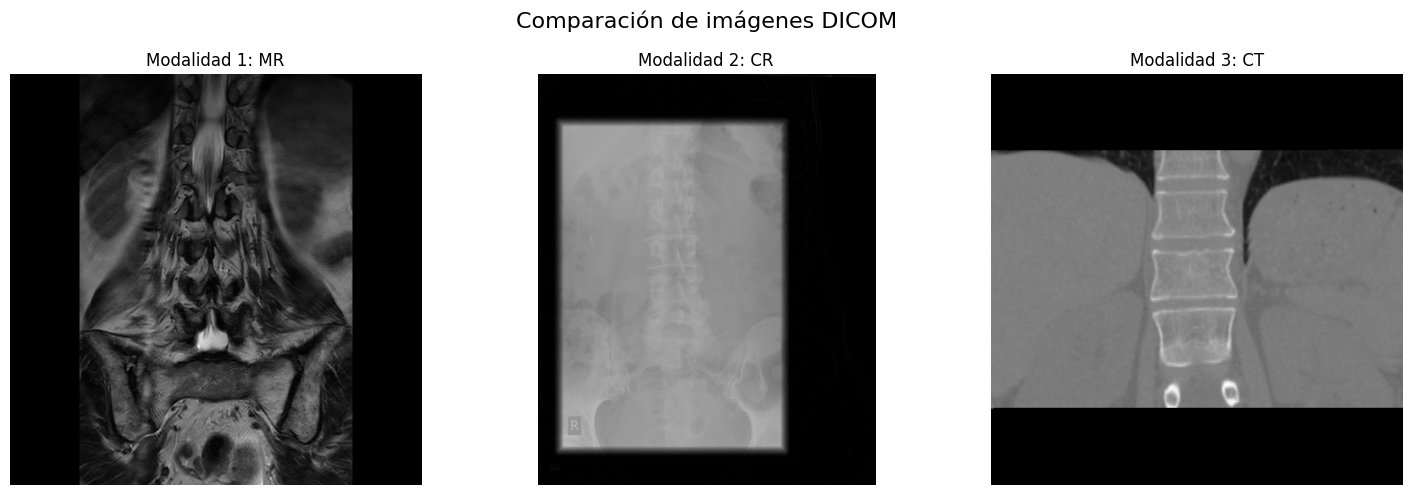

In [70]:
plt.figure(figsize=(15, 5))

# Recorrer y graficar cada imagen
for i, path in enumerate(rutas_dicom):
    ds = pydicom.dcmread(path)
    img = ds.pixel_array
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Modalidad {i + 1}: {ds.get('Modality', 'N/A')}")
    plt.axis('off')

# Título general
plt.suptitle("Comparación de imágenes DICOM", fontsize=16)
plt.tight_layout()
plt.show()

*  Incluir anotaciones y describir las diferencias encontradas. 

<hr>
<h3><strong>3. Simulación de flujo de información imagenológica </strong></h3>

* Diseñar un diagrama de flujo que represente el recorrido de una imagen médica desde su solicitud hasta la visualización e informe. 